<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EB%8B%A4%EB%B3%80%EB%9F%89%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다변량예측

lstm = 시퀀스 있는거. 이거는 순서 있는 거라, 들어간 입력값이 몇번 다시 들어가니까 리커런셜.
rnn 중에서도 simple rnn도 있고,  긴 거는 lstm 쓰기도 하고. gru도 있다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [ ]:
raw_data = pd.read_csv('./datasets/samsung210101_220328.csv')
print(raw_data.head())
print(raw_data.info())

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
1  2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2  2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
3  2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.410156  10009778
4  2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.250000  23501171
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       552 non-null    object 
 1   Open       552 non-null    float64
 2   High       552 non-null    float64
 3   Low        552 non-null    float64
 4   Close      552 non-null    float64
 5   Adj Close  552 non-null    float64
 6   Volume     552 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 30.3+ KB
None


In [ ]:
raw_data['Date']= pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.410156  10009778
2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.250000  23501171


In [ ]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(raw_data)

In [ ]:
print(scaled_data[:5])

[[0.27044025 0.23380282 0.2690678  0.26185567 0.24103558 0.14387973]
 [0.28092243 0.24507042 0.26694915 0.26804124 0.24672941 0.17077741]
 [0.25786164 0.22629108 0.26059322 0.26804124 0.24672941 0.11382334]
 [0.27463312 0.24131455 0.28177966 0.2742268  0.25242332 0.11084267]
 [0.2851153  0.2600939  0.28813559 0.29484536 0.27140245 0.2602388 ]]


In [ ]:
print(scaled_data.shape)

(552, 6)


In [ ]:
#시퀀셜 데이터로 바꿔주자
sequence_X =[]
#y는 시퀀셜은 아니지만 쌍 맞춰서 이렇게 네이밍
sequence_Y =[]

for i in range(len(scaled_data)-30):
  x= scaled_data[i:i+30]
  y= scaled_data[i+30][3]
  sequence_X.append(x)
  sequence_Y.append(y)
  

In [ ]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.27044025 0.23380282 0.2690678  0.26185567 0.24103558 0.14387973]
 [0.28092243 0.24507042 0.26694915 0.26804124 0.24672941 0.17077741]
 [0.25786164 0.22629108 0.26059322 0.26804124 0.24672941 0.11382334]
 [0.27463312 0.24131455 0.28177966 0.2742268  0.25242332 0.11084267]
 [0.2851153  0.2600939  0.28813559 0.29484536 0.27140245 0.2602388 ]
 [0.3312369  0.28262911 0.31991525 0.33195876 0.30556487 0.26689845]
 [0.33962264 0.30328638 0.33898305 0.35051546 0.32264611 0.17717692]
 [0.35639413 0.30892019 0.3559322  0.36082474 0.3321358  0.12578474]
 [0.37316562 0.32769953 0.37288136 0.36082474 0.3321358  0.18721084]
 [0.35429769 0.30140845 0.35169492 0.34020619 0.31315658 0.15836046]
 [0.34591195 0.32206573 0.35381356 0.37525773 0.34542119 0.15925571]
 [0.40461216 0.34647887 0.39618644 0.38762887 0.35680877 0.17745919]
 [0.4067086  0.36150235 0.41101695 0.41030928 0.37768595 0.13873752]
 [0.4067086  0.35399061 0.40042373 0.38969072 0.35870666 0.12338794]
 [0.37526205 0.35774648 0.38347458

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size= 0.2)
xy= X_train, X_test, Y_train, Y_test
np.save('./samsung_preprocessed_30.npy', xy) 

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
with open('./samsung_minmaxscaler.pickle', 'wb') as f: #binaray파일로 생성하며 열겠다
  pickle.dump(minmaxscaler, f)

In [ ]:
with open('./samsung_minmaxscaler.pickle', 'rb') as f:
  minmaxscaler = pickle.load(f)       #덮어씀.

In [ ]:
model= Sequential()
model.add(LSTM(50, input_shape=(30, 6),   #변수가 6개! 아까 시계열 때는 1이었어 
               activation='tanh'))   #long short term memory. 얘는 활성화함수로 tanh쓴다. 근데 왜 이름이 이렇지?
model.add(Flatten())
model.add(Dense(1))  #맨마지막은 종가 한가지만 출력하니까 1
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11400     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
fit_hist= model.fit(X_train, Y_train, batch_size=128, epochs= 500, callbacks=[early_stopping], verbose=1, validation_data = (X_test, Y_test), shuffle=False)



Epoch 1/500
4/4 [==============================] - 4s 202ms/step - loss: 0.2007 - val_loss: 0.0241
Epoch 2/500
4/4 [==============================] - 0s 39ms/step - loss: 0.0130 - val_loss: 0.0334
Epoch 3/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0395 - val_loss: 0.0283
Epoch 4/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0187 - val_loss: 0.0035
Epoch 5/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0038 - val_loss: 0.0058
Epoch 6/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 7/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 8/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 9/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 10/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 11/500
4/4 [

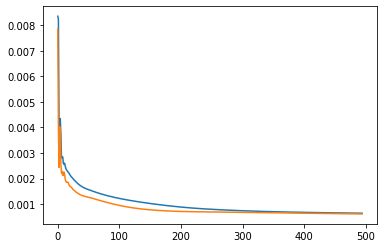

In [ ]:
plt.plot(fit_hist.history['loss'][5:], label='loss')
plt.plot(fit_hist.history['val_loss'][5:], label='val_loss')
plt.show()

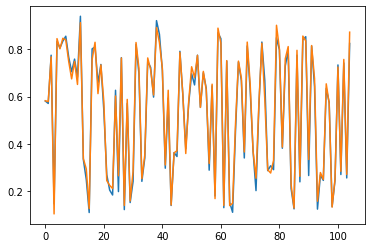

In [ ]:
pred= model.predict(X_test)
plt.plot(Y_test, label='actual')
plt.plot(pred, label='predict')
plt.show()